# baseline regression

## aim
since the control plates don't always dispense properly, it's important to estimate the baseline abosorbance for each compound - to subtract form the protein traces.
The model needs to interpolate / extrapolate nonlinear functions reliably with few data points



In [1]:
import os
import os.path as osp
import plates

data_dir = '../data/plates'
files = [osp.join(data_dir, i) for i in os.listdir(data_dir) if 'blank' in i]
files

['../data/plates/kpi-blank-t1.CSV',
 '../data/plates/kpi-bsa-blank-t0.CSV',
 '../data/plates/bsa-blank-t1.CSV',
 '../data/plates/bsa-blank-t3.CSV',
 '../data/plates/kpi-blank-t0.CSV',
 '../data/plates/kpi-blank-t3.CSV',
 '../data/plates/kpi-blank-t2.CSV',
 '../data/plates/bsa-blank-t2.CSV']

In [2]:
all_plates = {osp.basename(i).split('.')[0]:plates.uv384.UV384m4(i) for i in files}
all_plates

{'kpi-blank-t1': <plates.uv384.UV384m4 at 0x7f64bad19760>,
 'kpi-bsa-blank-t0': <plates.uv384.UV384m4 at 0x7f64bad19b80>,
 'bsa-blank-t1': <plates.uv384.UV384m4 at 0x7f64bad19bb0>,
 'bsa-blank-t3': <plates.uv384.UV384m4 at 0x7f64bad19c10>,
 'kpi-blank-t0': <plates.uv384.UV384m4 at 0x7f64bad19c70>,
 'kpi-blank-t3': <plates.uv384.UV384m4 at 0x7f64bad19d00>,
 'kpi-blank-t2': <plates.uv384.UV384m4 at 0x7f64bad19d60>,
 'bsa-blank-t2': <plates.uv384.UV384m4 at 0x7f64bad19dc0>}

In [3]:
p0 = all_plates['kpi-blank-t0']
p0.blocks[0]

,250,251,252,253,254,255,256,257,258,259,...,791,792,793,794,795,796,797,798,799,800
A1,3.500,3.5,3.5,3.5,3.500,3.500,3.315,3.347,3.500,3.500,...,0.040,0.040,0.041,0.038,0.039,0.040,0.039,0.039,0.039,0.040
A2,3.500,3.5,3.5,3.5,3.420,3.500,3.337,3.392,3.500,3.500,...,0.033,0.033,0.034,0.032,0.032,0.031,0.033,0.032,0.032,0.032
A3,3.500,3.5,3.5,3.5,3.500,3.494,3.367,3.332,3.486,3.435,...,0.041,0.041,0.041,0.039,0.040,0.041,0.040,0.040,0.040,0.040
A4,3.500,3.5,3.5,3.5,3.500,3.500,3.457,3.393,3.500,3.480,...,0.039,0.037,0.039,0.037,0.038,0.038,0.038,0.037,0.038,0.038
A5,3.500,3.5,3.5,3.5,3.493,3.500,3.500,3.336,3.407,3.500,...,0.039,0.038,0.039,0.037,0.037,0.038,0.038,0.038,0.038,0.037
A6,3.487,3.5,3.5,3.5,3.500,3.500,3.340,3.447,3.500,3.500,...,0.082,0.081,0.082,0.080,0.081,0.083,0.082,0.082,0.080,0.080
A7,3.500,3.5,3.5,3.5,3.500,3.500,3.419,3.410,3.402,3.472,...,0.095,0.095,0.097,0.094,0.096,0.098,0.097,0.095,0.095,0.095
A8,3.500,3.5,3.5,3.5,3.500,3.500,3.386,3.456,3.496,3.365,...,0.041,0.040,0.042,0.040,0.041,0.041,0.040,0.039,0.040,0.040


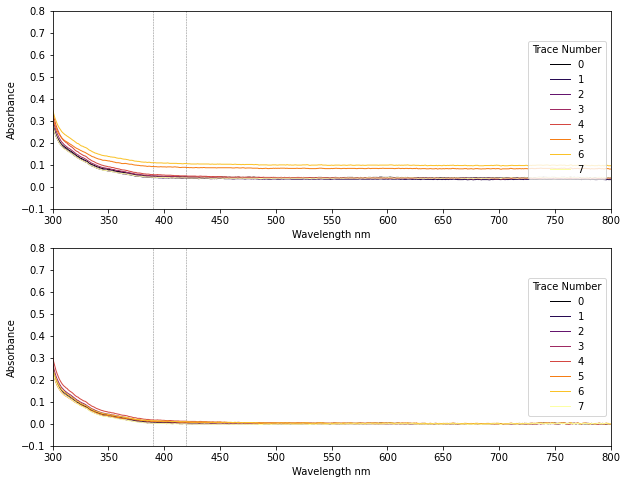

In [4]:
import matplotlib.pyplot as plt

b0=p0.blocks[0]
fig,ax = plt.subplots(2,1, figsize = (10,8))
plates.reports.subplotTraces(b0, ax[0])
plates.reports.subplotTraces(plates.uv384.Block(b0).norm, ax[1])

### I'll norm all of the dfs

In [5]:
data = {k:[plates.uv384.Block(i).norm for i in j.blocks] for j,k in zip(all_plates.values(),all_plates.keys())}
data['kpi-blank-t1'][:2]

[      250    251    252    253    254    255    256    257    258    259  ...  \
 A1  3.406  3.461  3.461  3.461  3.461  3.460  3.379  3.460  3.419  3.383  ...   
 A2  3.468  3.468  3.468  3.468  3.468  3.468  3.275  3.468  3.468  3.468  ...   
 A3  3.441  3.455  3.455  3.455  3.455  3.455  3.411  3.308  3.293  3.455  ...   
 A4  3.448  3.324  3.448  3.448  3.448  3.448  3.426  3.435  3.387  3.448  ...   
 A5  3.458  3.458  3.458  3.458  3.458  3.378  3.400  3.314  3.346  3.434  ...   
 A6  3.417  3.417  3.417  3.417  3.417  3.357  3.315  3.378  3.390  3.344  ...   
 A7  3.458  3.416  3.379  3.453  3.458  3.458  3.403  3.340  3.412  3.443  ...   
 A8  3.460  3.460  3.460  3.460  3.460  3.415  3.413  3.345  3.361  3.460  ...   
 
       791    792    793    794    795    796    797    798    799  800  
 A1 -0.001  0.000  0.000  0.000 -0.001  0.000  0.000  0.001  0.000  0.0  
 A2  0.001  0.001  0.001  0.001  0.000  0.002  0.003  0.002  0.001  0.0  
 A3  0.001  0.001  0.003  0.002  0.002

## substrate concs

In [6]:
import pandas as pd
bsa_map = pd.read_csv('bsa_test_map_actual.csv', index_col = 0)
kpi_map = pd.read_csv('kpi_test_map_actual.csv', index_col = 0)
kpi_map.head()

,dmso vol,cpd vol,cpd name,cpd conc µM
A1,1.500000,0.000000,NaN,0.000000
A2,1.495627,0.004373,S1202,1.482433
A3,1.465015,0.034985,S1202,11.859465
A4,1.381924,0.118076,S1202,40.025696
A5,1.220117,0.279883,S1202,94.875723


In [7]:
all_plates

{'kpi-blank-t1': <plates.uv384.UV384m4 at 0x7f64bad19760>,
 'kpi-bsa-blank-t0': <plates.uv384.UV384m4 at 0x7f64bad19b80>,
 'bsa-blank-t1': <plates.uv384.UV384m4 at 0x7f64bad19bb0>,
 'bsa-blank-t3': <plates.uv384.UV384m4 at 0x7f64bad19c10>,
 'kpi-blank-t0': <plates.uv384.UV384m4 at 0x7f64bad19c70>,
 'kpi-blank-t3': <plates.uv384.UV384m4 at 0x7f64bad19d00>,
 'kpi-blank-t2': <plates.uv384.UV384m4 at 0x7f64bad19d60>,
 'bsa-blank-t2': <plates.uv384.UV384m4 at 0x7f64bad19dc0>}

In [8]:
class Dataset:
    def __init__(self, data):
        self.data = self.preprocess(data)
    def __getitem__(self, idx):
        return self.data[idx]
    def __iter__(self):
        for i in self.data:
            yield i
    def __repr__(self):
        return f'len: {len(self)}'
    def __len__(self):
        return len(self.data)
    def preprocess(self, data):
        d = {}
        for i in data:
            contents = data[i]
            if 'bsa' in i:
                concs = bsa_map
            else:
                concs = kpi_map
            d[i] = {'concs':concs,
                      'data':contents}
        l = []
        for i in d:
            dict_entry = d[i] # concs, data (list)
            for j in dict_entry['data'].blocks: # j is DataFrame
                concs = dict_entry['concs'].loc[j.index,'cpd conc µM']
                l.append([j,concs])
        return l
    
dataset = Dataset(all_plates)
dataset

len: 184

# task
given a $n$ sized sample from absorbace $a$ and concentration $c$, predict full absorbance spectra for $c_i$.

Model must fit as few samples as possible!

In [9]:
next(iter(dataset))

[      250    251    252    253  254    255    256    257    258    259  ...  \
 A1  3.445  3.500  3.500  3.500  3.5  3.499  3.418  3.499  3.458  3.422  ...   
 A2  3.500  3.500  3.500  3.500  3.5  3.500  3.307  3.500  3.500  3.500  ...   
 A3  3.486  3.500  3.500  3.500  3.5  3.500  3.456  3.353  3.338  3.500  ...   
 A4  3.500  3.376  3.500  3.500  3.5  3.500  3.478  3.487  3.439  3.500  ...   
 A5  3.500  3.500  3.500  3.500  3.5  3.420  3.442  3.356  3.388  3.476  ...   
 A6  3.500  3.500  3.500  3.500  3.5  3.440  3.398  3.461  3.473  3.427  ...   
 A7  3.500  3.458  3.421  3.495  3.5  3.500  3.445  3.382  3.454  3.485  ...   
 A8  3.500  3.500  3.500  3.500  3.5  3.455  3.453  3.385  3.401  3.500  ...   
 
       791    792    793    794    795    796    797    798    799    800  
 A1  0.038  0.039  0.039  0.039  0.038  0.039  0.039  0.040  0.039  0.039  
 A2  0.033  0.033  0.033  0.033  0.032  0.034  0.035  0.034  0.033  0.032  
 A3  0.046  0.046  0.048  0.047  0.047  0.048  0.0

## interpolation

In [10]:
import numpy as np
from scipy import interpolate

def process(datapoint):
    a,c = datapoint
    return a.values, c.values, np.array(a.columns)

process(dataset[0])

(array([[3.445, 3.5  , 3.5  , ..., 0.04 , 0.039, 0.039],
        [3.5  , 3.5  , 3.5  , ..., 0.034, 0.033, 0.032],
        [3.486, 3.5  , 3.5  , ..., 0.047, 0.046, 0.045],
        ...,
        [3.5  , 3.5  , 3.5  , ..., 0.081, 0.08 , 0.083],
        [3.5  , 3.458, 3.421, ..., 0.042, 0.041, 0.042],
        [3.5  , 3.5  , 3.5  , ..., 0.041, 0.04 , 0.04 ]]),
 array([  0.        ,   1.48243317,  11.85946534,  40.02569551,
         94.87572269, 185.30414587, 320.20556407, 508.47457627]),
 array([250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
        263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
        276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
        289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
        302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
        315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
        328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
  

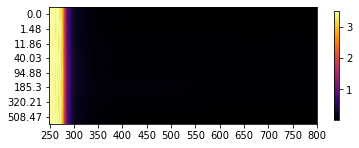

In [11]:
def plot_trace_im(a,c,w):
    plt.set_cmap('inferno')
    plt.imshow(a, aspect=30)
    plt.xticks(range(len(w))[::50], w[::50])
    plt.yticks(range(len(c)), [round(i,2) for i in c])
    plt.colorbar(shrink=0.5)
    plt.show()

plot_trace_im(*process(dataset[0]))

/home/james/miniconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/james/miniconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/james/miniconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/james/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/james/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/james/miniconda3/lib/python3.8/site-packages/matplotl

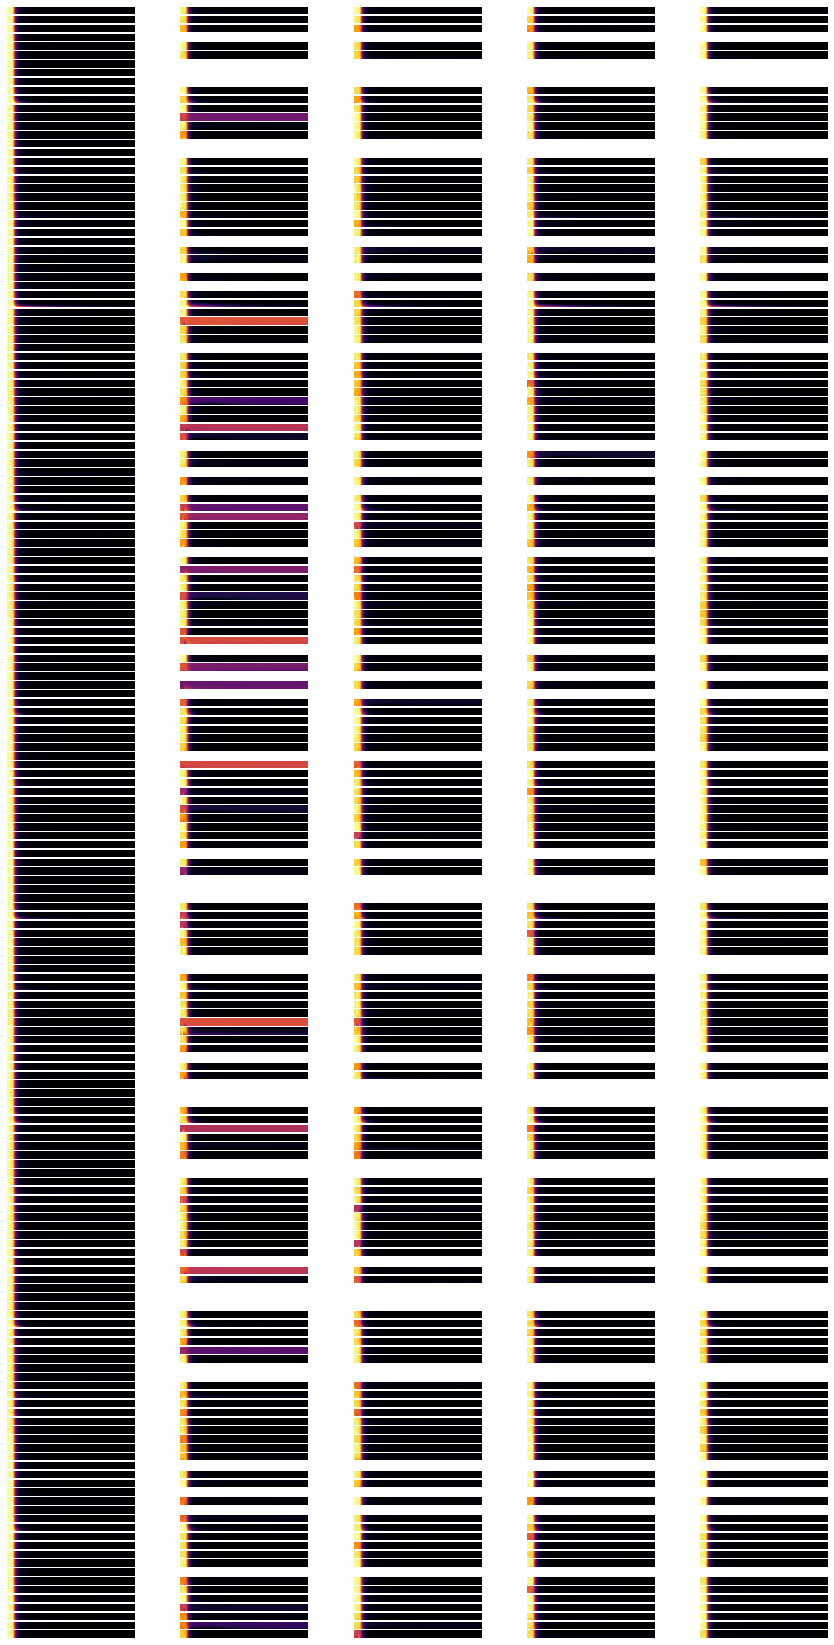

In [12]:
import random

fig, ax = plt.subplots(len(dataset), 5, figsize=(15,30))
for i,j in zip(dataset, ax):
    a,c,w = process(i)
    j[0].imshow(a, aspect = 4)
    j[0].axis('off')
    
    for k,l in zip([2,3,4,6], [1,2,3,4]):
        # sample
        idx = list(range(len(c)))
        sample_idx = sorted(random.sample(idx, k = k)) 

        c_sample = c[sample_idx]
        a_sample = a[sample_idx]

        # interpolate
        interp = interpolate.interp1d(c_sample,a_sample.transpose(), fill_value='extrapolate')
        yh = np.array([interp(i) for i in c])
        j[l].imshow(yh, aspect=4)
        j[l].axis('off')
plt.show() 

## issues
- why do some fail?
  - because concs are all 0

## notes
- ```kind='linear'``` apparently is ok for extrapolation, not so much with quadratic. linear seems like a reasonable assumption.
- RBF wouldnt work because either the matrices were not the same shape or the matrices are singular
- some of the results above are bad with a low sample size, will need to bear this in mind with read data

In [20]:
dataset[6]

[      250    251    252    253  254    255    256    257    258    259  ...  \
 C1  3.500  3.500  3.500  3.500  3.5  3.500  3.498  3.492  3.499  3.500  ...   
 C2  3.500  3.500  3.500  3.500  3.5  3.500  3.482  3.291  3.370  3.500  ...   
 C3  3.500  3.500  3.500  3.500  3.5  3.500  3.500  3.500  3.500  3.453  ...   
 C4  3.458  3.500  3.500  3.455  3.5  3.446  3.394  3.500  3.500  3.492  ...   
 C5  3.500  3.446  3.500  3.500  3.5  3.500  3.388  3.500  3.500  3.500  ...   
 C6  3.500  3.389  3.491  3.500  3.5  3.500  3.500  3.500  3.500  3.500  ...   
 C7  3.500  3.500  3.500  3.500  3.5  3.500  3.319  3.300  3.313  3.500  ...   
 C8  3.440  3.500  3.500  3.500  3.5  3.500  3.500  3.500  3.500  3.500  ...   
 
       791    792    793    794    795    796    797    798    799    800  
 C1  0.033  0.032  0.034  0.034  0.034  0.034  0.035  0.034  0.033  0.033  
 C2  0.035  0.034  0.036  0.035  0.034  0.036  0.037  0.036  0.034  0.034  
 C3  0.031  0.031  0.032  0.032  0.032  0.032  0.0

In [22]:
interp.fill_value

'extrapolate'